<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/TF_Pneumonia_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
# use the link for TPU troubleshooting https://cloud.google.com/tpu/docs/troubleshooting

Device: grpc://10.116.91.210:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.116.91.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.116.91.210:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8


In [3]:
print(tf.__version__)

2.2.0


In [ ]:
#drive.flush_and_unmount()

In [ ]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#check present working directory
cwd = !pwd
print("Current folder: ",cwd)
# %cd '/content/drive/My Drive/AIML/AI/rsnadata/'  #changing as mount subfolder causing issue AIML/AI/rsnadata/
%cd '/content/drive/My Drive'
cwd = !pwd
print("Current working directory after seting proj folder: ",cwd)

Current folder:  ['/content']
/content/drive/My Drive
Current working directory after seting proj folder:  ['/content/drive/My Drive']


In [ ]:
!ls -ltr

In [6]:
from google.colab import auth
auth.authenticate_user()
project_id = 'thirumlai'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://thirumlai/


In [7]:
# bucket_name = 'thirumlai'
# !gsutil -m cp -r /content/drive/My\ Drive/positive/* gs://thirumlai/positive

Streaming output truncated to the last 5000 lines.
Copying file:///content/drive/My Drive/positive/2d370cb1-791e-407e-9408-9156664de6b6.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2d519447-4bcf-42ad-bb28-cf051b649fff.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2d5d4cc5-5633-4718-ac7a-61bd0c7dbf4f.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2d6d00a6-a1e4-4423-879c-3fb846daa88c.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2db5d817-4f4c-4773-afa0-ed3cdb3a5035.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2dce719f-1702-406f-a471-03f033f1822a.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2dd692a5-a60c-443e-8299-af5d03949b60.jpg [Content-Type=image/jpeg]...
Copying file:///content/drive/My Drive/positive/2e02f4ce-3130-42b9-af78-997942bc4f38.jpg [Content-Type=image/jpeg]...
Copyi

In [8]:
!gsutil -m cp -r /content/drive/My\ Drive/normal/* gs://thirumlai/normal

Streaming output truncated to the last 5000 lines.
Copying file:///content/drive/My Drive/normal/cd05916f-af4d-47a0-a4b1-4f9d2436d54f.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd083656-2310-4daf-8503-9fb219bf9638.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd088caa-f31b-44ec-af78-660e4929c583.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd0890b1-db82-4e4b-9198-68d157fd9662.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd0920bf-ef5a-43d4-bcaa-e174f3f2690c.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd10b0eb-c04d-4231-a24e-90581c4b4af2.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd1b5928-d462-4b44-a6c6-c85558b4b6ea.png [Content-Type=image/png]...
Copying file:///content/drive/My Drive/normal/cd1b5db7-9971-459a-ad89-06a292992428.png [Content-Type=image/png]...
Copying file:///content/drive

In [ ]:
import zipfile


In [37]:
!pwd


/content/drive/My Drive


In [41]:
!ls -Slhr normal | head -5

total 1.5G
-rw------- 1 root root    0 Jun 27 21:01 500f4aab-ad9e-4b4b-aa8d-1be7d18ae638.png
-rw------- 1 root root  27K Jun 27 21:02 f1a6ae49-8a55-4fc9-886c-4bfb6be0d8e2.png
-rw------- 1 root root  28K Jun 27 21:04 c5371ee3-958d-40de-8359-13c58e0bc071.png
-rw------- 1 root root  30K Jun 27 21:03 c4095ef6-7014-420e-a40d-3a3f711c500f.png


In [ ]:
# # Execute this code only once - which extracts the dataset in the directory trainlabels
# zip_ref = zipfile.ZipFile('resized-20200627T140143Z-001.zip', 'r')
# zip_ref.extractall("trainimages")

In [ ]:
# stage_2_train_labels_csv.zip
zip_train_labels = zipfile.ZipFile('stage_2_train_labels_csv.zip', 'r')
zip_train_labels.extractall(".")

In [ ]:
trainlabels_df = pd.read_csv('stage_2_train_labels.csv') 
trainlabels_df.head(10)

In [ ]:
#read Target 1 files and move to positive folder
normal_df = trainlabels_df[trainlabels_df['Target']==0]['patientId']
postive_df = trainlabels_df[trainlabels_df['Target']==1]['patientId']

In [ ]:
normal_df.head()

In [ ]:
print('positive count {}'.format( postive_df.size))
print('normal count {}'.format(normal_df.size))

In [ ]:
import os
trimg=np.array(os.listdir('trainimages/resized'))

In [ ]:
trimg.size #26157
9555+20672 #=30227
202159+5893

In [ ]:
trimg[1]

In [ ]:
cnt =0

for fname in trimg:
  fstr = str(fname)
  if fstr.endswith('.png'):
    fstr = fname[:fname.rindex('.png')]
    if cnt<5:
      print(fstr)
    cnt+=1
    if fstr in postive_df.to_list():
      if cnt<5:
        print('Renaming...{} to {}'.format(fname,fstr+'.jpg'))
      src = os.path.join('trainimages/resized',fname)
      dst = os.path.join('trainimages/resized',fstr+'.jpg')
      os.rename(src,dst)

In [ ]:
postive_df.size

In [ ]:
posimg=np.array(os.listdir('positive'))
posimg.size

In [ ]:
posimg=np.array(os.listdir('normal'))
posimg.size  #20259

In [ ]:
20259+5893

In [ ]:
import glob
import shutil

In [ ]:
pngcount = len(glob.glob1('trainimages/resized',"*.png"))
pngcount

In [ ]:
src_dir = "trainimages/resized/"
dst_dir = "positive"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [ ]:
src_dir = "trainimages/resized"
dst_dir = "normal"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
    shutil.copy(jpgfile, dst_dir)

In [43]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
GCS_PATH = 'gs://thirumlai'       #cwd[0] #/content/drive/My Drive
IMAGE_SIZE = [180, 180]
EPOCHS = 25

In [44]:
GCS_PATH

'gs://thirumlai'

In [45]:
filenames = tf.io.gfile.glob(str(GCS_PATH + '/positive/*'))
filenames.extend(tf.io.gfile.glob(str(GCS_PATH +'/normal/*')))

train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

In [46]:
len(filenames)

26151

In [47]:
print('trainset size {} and validation test size {}'.format(len(train_filenames),len(val_filenames)))

trainset size 20920 and validation test size 5231


In [48]:
COUNT_NORMAL = len([filename for filename in train_filenames if "normal" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "positive" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))
# Normal images count in training set: 16205
# Pneumonia images count in training set: 4716

Normal images count in training set: 16192
Pneumonia images count in training set: 4728


In [49]:
# Normal images count in training set: 16217
# Pneumonia images count in training set: 4704
16217+4704
16235+4686

20921

In [50]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

for f in train_list_ds.take(5):
    print(f.numpy())

b'gs://thirumlai/positive/57880594-01e6-4768-bd1c-b943840d6040.jpg'
b'gs://thirumlai/normal/e60ac83d-b202-4f51-9b5c-d0f8cf24ca15.png'
b'gs://thirumlai/normal/977a5fe5-f89f-4426-9f96-1e8189512952.png'
b'gs://thirumlai/normal/b178a56d-0194-4475-af25-4caa97eedd38.png'
b'gs://thirumlai/normal/a877183c-7c94-4419-824c-4acb99354d90.png'


In [51]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 20920
Validating images count: 5231


In [52]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == "positive"

In [ ]:
# parts = tf.strings.split('normal/8e59fae6-479f-43f9-a1cc-1a2aba178e95.png', os.path.sep)
# parts[-2] == 'normal'

In [53]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, IMAGE_SIZE)

In [54]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [55]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [56]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


In [ ]:
# !ls -ltr positive/77c10182-8222-4824-aa46-9afec3d539ca.jpg
# !ls -ltr '/content/drive/My Drive/normal/e3afb9ea-32d7-4c1e-b355-d5f1bcfac4fa.png'

In [57]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [58]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds))

In [59]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(16):
        ax = plt.subplot(4,4,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

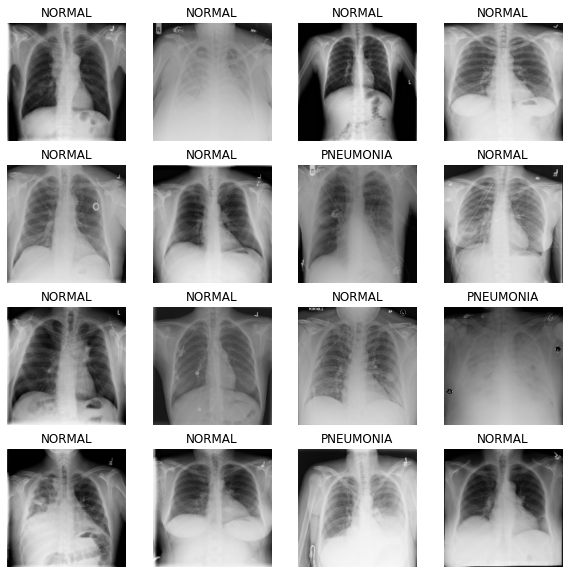

In [60]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [61]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [62]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [63]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [64]:
initial_bias = np.log([COUNT_PNEUMONIA/COUNT_NORMAL])
initial_bias

array([-1.23101501])

In [65]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.65
Weight for class 1: 2.21


In [74]:
myadam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [75]:
with strategy.scope():
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer=myadam,
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [67]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight,
)

Epoch 1/25
163/163 [==============================] - 858s 5s/step - precision: 0.3306 - accuracy: 0.6173 - recall: 0.6777 - loss: 0.7009 - val_precision: 0.0000e+00 - val_accuracy: 0.7781 - val_recall: 0.0000e+00 - val_loss: 0.6398
Epoch 2/25
163/163 [==============================] - 12s 72ms/step - precision: 0.3816 - accuracy: 0.6754 - recall: 0.7027 - loss: 0.6142 - val_precision: 0.0000e+00 - val_accuracy: 0.7777 - val_recall: 0.0000e+00 - val_loss: 0.6783
Epoch 3/25
163/163 [==============================] - 12s 72ms/step - precision: 0.3980 - accuracy: 0.6890 - recall: 0.7304 - loss: 0.5858 - val_precision: 0.2217 - val_accuracy: 0.2217 - val_recall: 1.0000 - val_loss: 0.7595
Epoch 4/25
163/163 [==============================] - 12s 71ms/step - precision: 0.4144 - accuracy: 0.7060 - recall: 0.7404 - loss: 0.5688 - val_precision: 0.2715 - val_accuracy: 0.4102 - val_recall: 0.9729 - val_loss: 0.8004
Epoch 5/25
163/163 [==============================] - 12s 71ms/step - precision: 

InvalidArgumentError: {{function_node __inference_train_function_19213}} Expected image (JPEG, PNG, or GIF), got empty file
	 [[{{node DecodeJpeg}}]]
	 [[MultiDeviceIteratorGetNextFromShard]]
	 [[RemoteCall]]
	 [[IteratorGetNextAsOptional]]


total 1.5G
-rw------- 1 root root    0 Jun 27 21:01 500f4aab-ad9e-4b4b-aa8d-1be7d18ae638.png<br>
-rw------- 1 root root  27K Jun 27 21:02 f1a6ae49-8a55-4fc9-886c-4bfb6be0d8e2.png<br>
-rw------- 1 root root  28K Jun 27 21:04 c5371ee3-958d-40de-8359-13c58e0bc071.png<br>
-rw------- 1 root root  30K Jun 27 21:03 c4095ef6-7014-420e-a40d-3a3f711c500f.png<br>

In [42]:
!gsutil rm gs://thirumlai/normal/500f4aab-ad9e-4b4b-aa8d-1be7d18ae638.png

Removing gs://thirumlai/normal/500f4aab-ad9e-4b4b-aa8d-1be7d18ae638.png...
/ [1 objects]                                                                   
Operation completed over 1 objects.                                              


In [76]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("thirumlai_pneumonia_tpu.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,monitor='loss',restore_best_weights=True)

In [79]:
import math

In [85]:
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * math.exp(-k*epoch)
   return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_decay)

In [86]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=100,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/100
163/163 [==============================] - 19s 119ms/step - precision: 0.3371 - accuracy: 0.6264 - recall: 0.6765 - loss: 0.6529 - val_precision: 0.3372 - val_accuracy: 0.6180 - val_recall: 0.7412 - val_loss: 0.8200 - lr: 0.1000
Epoch 2/100
163/163 [==============================] - 12s 72ms/step - precision: 0.3851 - accuracy: 0.6789 - recall: 0.7062 - loss: 0.6032 - val_precision: 0.2266 - val_accuracy: 0.2717 - val_recall: 0.9362 - val_loss: 5.1456 - lr: 0.0905
Epoch 3/100
163/163 [==============================] - 13s 80ms/step - precision: 0.3889 - accuracy: 0.6836 - recall: 0.6987 - loss: 0.5999 - val_precision: 0.3425 - val_accuracy: 0.6045 - val_recall: 0.8358 - val_loss: 0.8004 - lr: 0.0819
Epoch 4/100
163/163 [==============================] - 13s 79ms/step - precision: 0.3997 - accuracy: 0.6929 - recall: 0.7186 - loss: 0.5897 - val_precision: 0.4555 - val_accuracy: 0.7689 - val_recall: 0.1975 - val_loss: 0.5010 - lr: 0.0741
Epoch 5/100
163/163 [==================

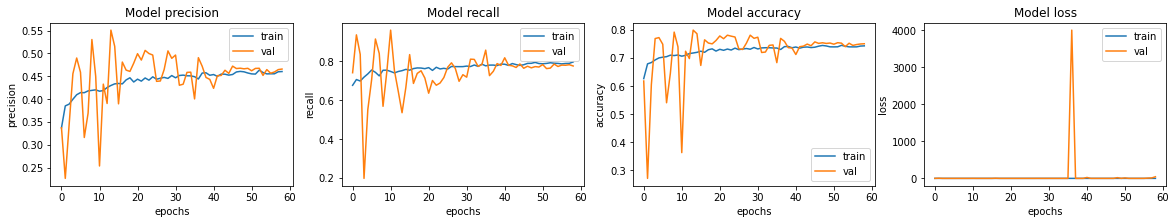

In [87]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])